### Fazer dois códigos python:

- Um código para criação de um sinal 4-pam;
- Um código para demodução do sinal 4 -pam, considerar que o sinal passou por um canal ruidoso.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Função que cria um sianl 4-pam, a partir do parâmetro bits (no caso uma string)
def create_signal_4pam(bits):
    #Dicionário para fazer o mapeamento dos bits para o sinal
    mapping = {
        '00': -3,
        '01': -1,
        '10': 1,
        '11': 3
    }
    #Inicializa-se um array vazio onde será armazenado o sinal de resposta. A string de bits será percorrida com passo 2 (já que o mapeamento é feito em 2 bits).
    #A cada 2 bits, o valor correspondente é armazenado no array
    signal = []
    for i in range(0, len(bits), 2):
        symbol = bits[i:i+2]
        signal.append(mapping[symbol])
    #Retornamos o array como numpy array
    return np.array(signal)

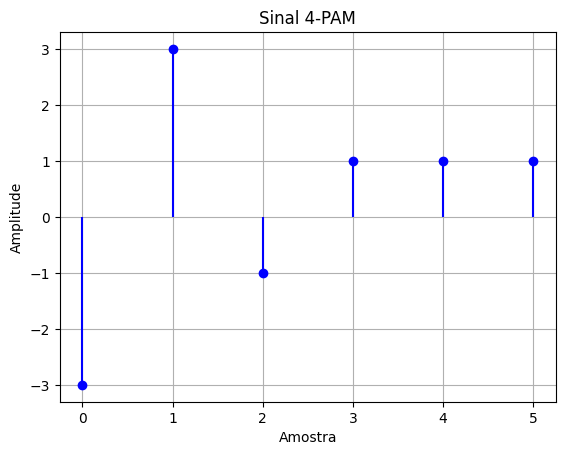

In [7]:
#Definindo uma sequencia aleatoria de bits para ser convertido no sinal
bits = '001101101010'
#Variável que armazena o resultadao da conversão da função criada acima 
signal = create_signal_4pam(bits)

#Plotando o sinal obrido
plt.stem(signal, linefmt='b-', markerfmt='bo', basefmt=' ')
plt.title('Sinal 4-PAM')
plt.xlabel('Amostra')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [4]:
#Função que faz a demodulação do sinal em uma sequencia de bits(processo contrario da função anterior)
#Parametros são o sinal (numpy array) a ser demodulado e uma variancia de ruido para ser adicionado ao sinal
#Retorno é uma sequencia de bits que representa a demodulação do sinal
def demodulate_siganl_4pam(signal, noise_variance):
    #Dicionário para fazer o mapeamento do sinal em bits
    demapping = {
        -3: '00',
        -1: '01',
        1: '10',
        3: '11'
    }
    
    #Criando uma string vazia para armazenar o resultado
    received_bits = ''
    #Usamos um foreach para percorrer o array do sinal
    for sample in signal:
        #Para cada amostra, adicionamos ruído gaussiano
        received_sample = sample + np.random.normal(scale=np.sqrt(noise_variance))
        #Encontramos o símbolo mais próximo
        closest_symbol = min(demapping.keys(), key=lambda x: abs(x - received_sample))
        #Adicionamos a string o resultado da operação de mapeamento
        received_bits += demapping[closest_symbol]
    
    return received_bits

In [13]:
#Criando uma variável que irá receber o resultado do mapeamento do sinal criando anteriormente
received_bits= demodulate_siganl_4pam(signal, noise_variance=0.5)
print("Sequência de bits demodulada:", received_bits)

Sequência de bits demodulada: 001101101010
